In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.ticker as ticker
import ast
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
courses_data=pd.read_csv('Course_info.csv')

In [151]:
courses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

In [152]:
courses_data.describe()

,id,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,2.097340e+05,209734.000000,2.097340e+05,209734.000000,209734.000000,209734.000000,209734.000000,209734.000000
mean,3.015403e+06,81.665529,3.096992e+03,3.747179,244.358812,44.874589,36.548395,265.558856
std,1.342558e+06,117.317846,1.558132e+04,1.533711,2458.098276,355.773107,51.871962,454.448676
min,1.769000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.950734e+06,19.990000,2.600000e+01,3.800000,3.000000,1.000000,11.000000,69.000000
50%,3.292863e+06,34.990000,2.060000e+02,4.333334,17.000000,5.000000,22.000000,133.000000
75%,4.189458e+06,99.990000,1.435000e+03,4.625000,74.000000,18.000000,42.000000,289.000000
max,4.914146e+06,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000


In [153]:
courses_data.head(10)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75000,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50000,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40000,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80000,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75000,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/
5,8139.0,14-Day Yoga Detox and Empowerment Course,True,29.99,"Lose weight, get healthier and fit on all leve...",20505.0,4.53012,796.0,135.0,31.0,1163.0,2011-07-15T04:13:24Z,2018-05-22,Health & Fitness,Yoga,Yoga,English,/course/yoga-for-weight-loss-and-core-strength...,Sadie Nardini,/user/sadienardini/
6,2762.0,Simple Strategy for Swing Trading the Stock Ma...,True,39.99,Use my favorite Technical Indicator and the Tr...,3309.0,3.85000,958.0,241.0,8.0,80.0,2010-04-14T16:32:46Z,2019-03-07,Finance & Accounting,Investing & Trading,Swing Trading,English,/course/swing-trading-the-stock-market/,Tom Watson,/user/tomwatson/
7,8082.0,Ruby Programming for Beginners,True,74.99,Learn Ruby Programming the fast and easy way!,28824.0,4.00000,741.0,189.0,56.0,363.0,2011-07-08T21:32:55Z,2022-09-26,Development,Programming Languages,Ruby,English,/course/learn-ruby-programming-in-ten-easy-steps/,Huw Collingbourne,/user/huwcollingbourne/
8,8075.0,How to Create an Awesome Demo Video for Your B...,True,149.99,You don't need to spend $10K in order to have ...,10761.0,3.90000,349.0,101.0,87.0,526.0,2011-07-06T14:06:34Z,2020-11-22,Business,Media,Demo Video,English,/course/how-to-create-awesome-demo-videos/,Miguel Hernandez,/user/miguelhernandez/
9,8069.0,Curso SEO Online,True,99.99,Curso SEO práctico. Aprenda a posicionar su si...,483.0,4.65000,100.0,45.0,73.0,373.0,2012-07-03T17:03:28Z,2020-02-28,Marketing,Search Engine Optimization,SEO,Spanish,/course/curso-de-posicionamiento-en-buscadores...,Juan Jose Ramos,/user/juanjo-ramos/


In [154]:
courses_data.isnull().sum()

id                      0
title                   0
is_paid                 0
price                   0
headline               27
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
instructor_url        427
dtype: int64

In [155]:
courses_data=courses_data.fillna("Not available currently")

In [156]:
courses_data.isnull().sum()

id                    0
title                 0
is_paid               0
price                 0
headline              0
num_subscribers       0
avg_rating            0
num_reviews           0
num_comments          0
num_lectures          0
content_length_min    0
published_time        0
last_update_date      0
category              0
subcategory           0
topic                 0
language              0
course_url            0
instructor_name       0
instructor_url        0
dtype: int64

In [157]:
courses_data['Price_in_Indian_Rupees']=round(courses_data['price']*83)

In [158]:
courses_data

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,...,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,Price_in_Indian_Rupees
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,...,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/,2074.0
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,...,2010-01-12T18:09:46Z,Not available currently,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/,0.0
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,...,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/,1659.0
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,...,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/,16599.0
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,...,2011-06-23T18:31:20Z,Not available currently,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/,13279.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209729,4913954.0,Let's Speak Urdu - The Urdu Grammar,True,19.99,Urdu - Become fluent in this beautiful South A...,3.0,0.00,0.0,0.0,5.0,...,2022-10-05T11:31:36Z,2022-10-06,Teaching & Academics,Language Learning,Urdu Language,English,/course/lets-speak-urdu-the-grammar/,Jawaid Hameed,/user/jawaid-hameed/,1659.0
209730,4914146.0,CompTIA Linux+ (XKO-004/005 # 2 Practice Exam ...,True,49.99,Practice Latest exam questions with detailed e...,0.0,0.00,0.0,0.0,0.0,...,2022-10-05T12:29:23Z,2022-10-05,IT & Software,IT Certifications,CompTIA Linux+,English,/course/comptia-linux-xko-004005-2-practice-ex...,Jean-François d'Halluin,/user/badre-lini/,4149.0
209731,4914002.0,CISSP 4 full exams #1 : All CISSP domains - 12...,True,49.99,Practice Latest exam questions with detailed e...,0.0,0.00,0.0,0.0,0.0,...,2022-10-05T11:04:05Z,2022-10-05,IT & Software,IT Certifications,CISSP - Certified Information Systems Security...,English,/course/cissp-4-full-exams-1-all-cissp-domains...,Jean-François d'Halluin,/user/badre-lini/,4149.0
209732,4913934.0,JD Edwards EnterpriseOne Fixed Assets Accounti...,True,119.99,Full-length course (Part-3 of 3) on JD Edwards...,0.0,0.00,0.0,0.0,9.0,...,2022-10-05T10:30:19Z,2022-10-05,Finance & Accounting,Other Finance & Accounting,Financial Accounting,English,/course/jde-fixed-assets-accounting-part-3/,Niranjan Bhatia,/user/systemic-software-solutions/,9959.0


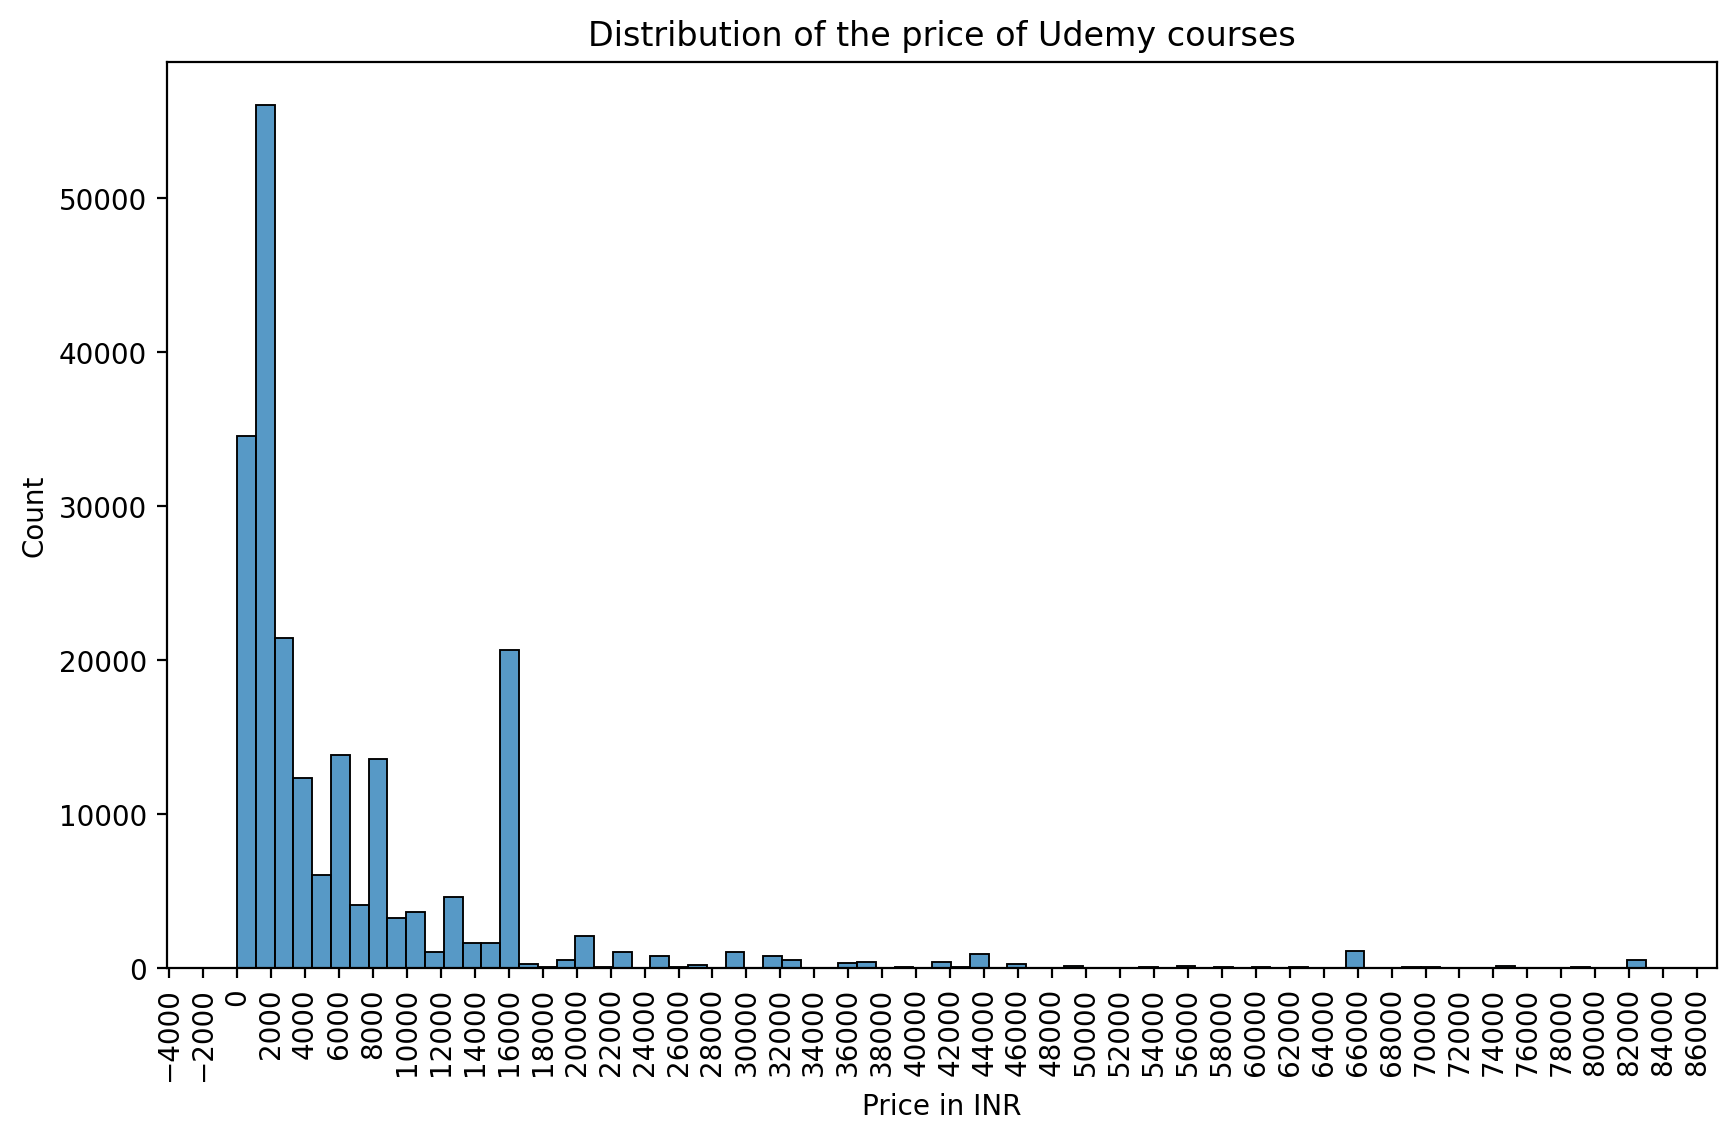

In [159]:
fig, ax = plt.subplots(figsize=(10,6), dpi=200)
sns.histplot(data=courses_data, x='Price_in_Indian_Rupees', bins=75)

plt.xlabel("Price in INR")
plt.title("Distribution of the price of Udemy courses");

plt.xticks(rotation=90)  
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

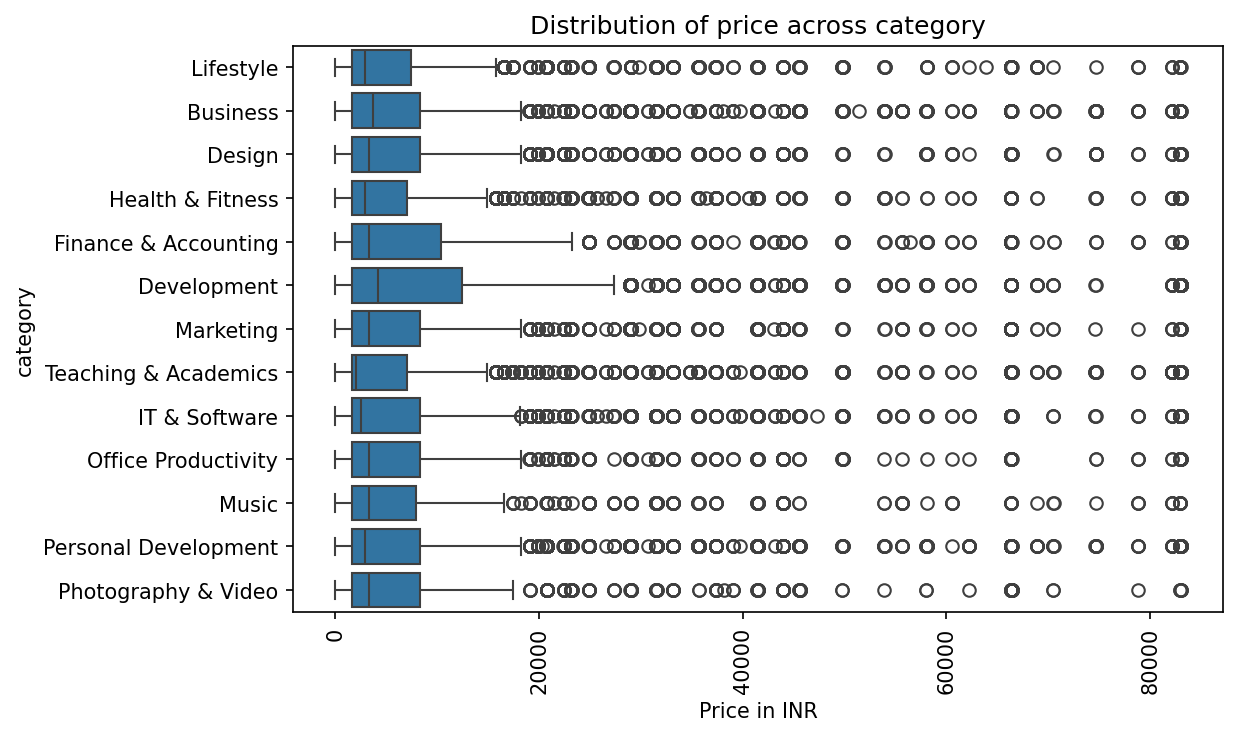

In [160]:
plt.figure(figsize=(8,5), dpi=150)
sns.boxplot(data=courses_data, x='Price_in_Indian_Rupees', y='category') 
plt.xticks(rotation=90)
plt.xlabel("Price in INR")
plt.title('Distribution of price across category')
plt.show()

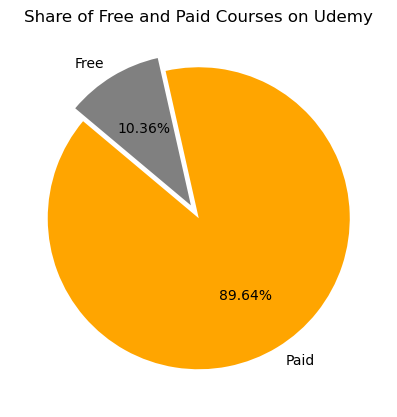

In [161]:
paid_counts = courses_data['is_paid'].value_counts()
explode = (0, 0.1)
colors = ['#FFA500', '#808080']  

plt.figure(figsize=(5, 5), dpi=100, facecolor='white')  # Increase figure size and dpi for HD
plt.pie(paid_counts, labels=['Paid', 'Free'], autopct='%1.2f%%', startangle=140, explode=explode, colors=colors)

plt.title("Share of Free and Paid Courses on Udemy")
plt.show()


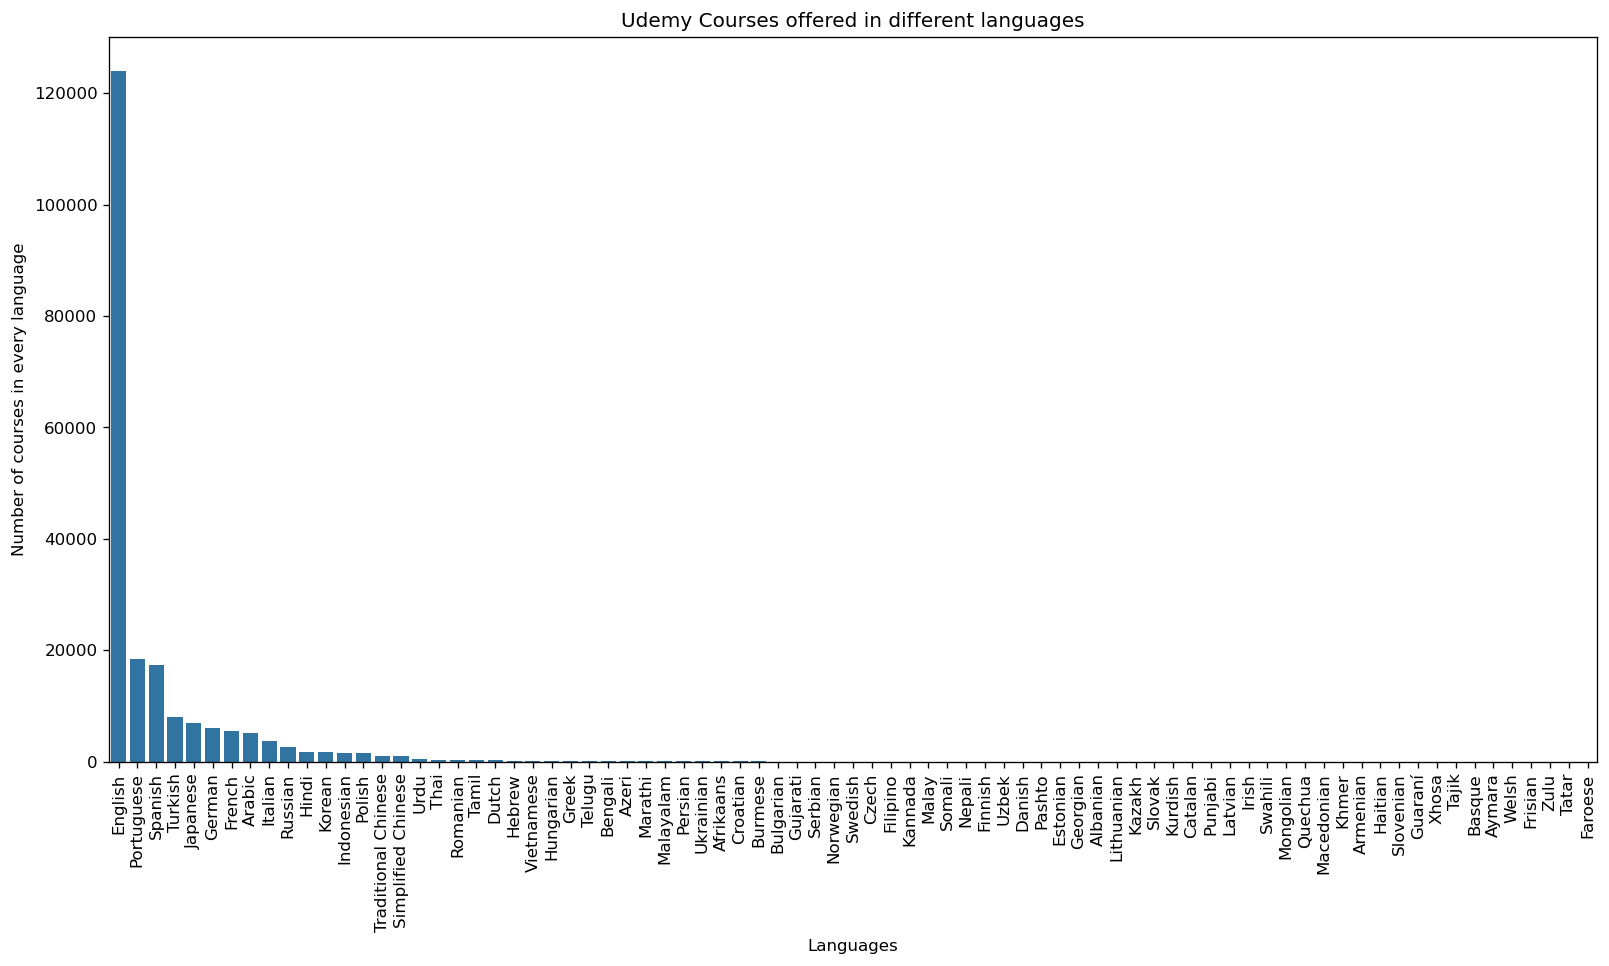

In [162]:

plt.figure(figsize=(16, 8), dpi=120)
sns.countplot(data=courses_data, x='language', order=courses_data['language'].value_counts().index)
plt.xlabel("Languages")
plt.ylabel("Number of courses in every language")
plt.title("Udemy Courses offered in different languages")
plt.xticks(rotation=90)

plt.show()

In [163]:
share_of_languages_top_15 = round(courses_data['language'].value_counts() * 100 / len(courses_data), 2)[:15]
share_of_languages_top_15

English                59.08
Portuguese              8.81
Spanish                 8.31
Turkish                 3.86
Japanese                3.34
German                  2.91
French                  2.61
Arabic                  2.48
Italian                 1.73
Russian                 1.28
Hindi                   0.84
Korean                  0.79
Indonesian              0.75
Polish                  0.73
Traditional Chinese     0.48
Name: language, dtype: float64

In [164]:
fig = px.pie(share_of_languages_top_15, values=share_of_languages_top_15.values, names=share_of_languages_top_15.index)
            
fig.update_traces(textposition='inside', texttemplate = '%{label}<br>%{value}%', rotation=150)
fig.update_layout(title_text='Top 15 languages in which courses are offered', title_x=0.5, showlegend=True)
fig.show()


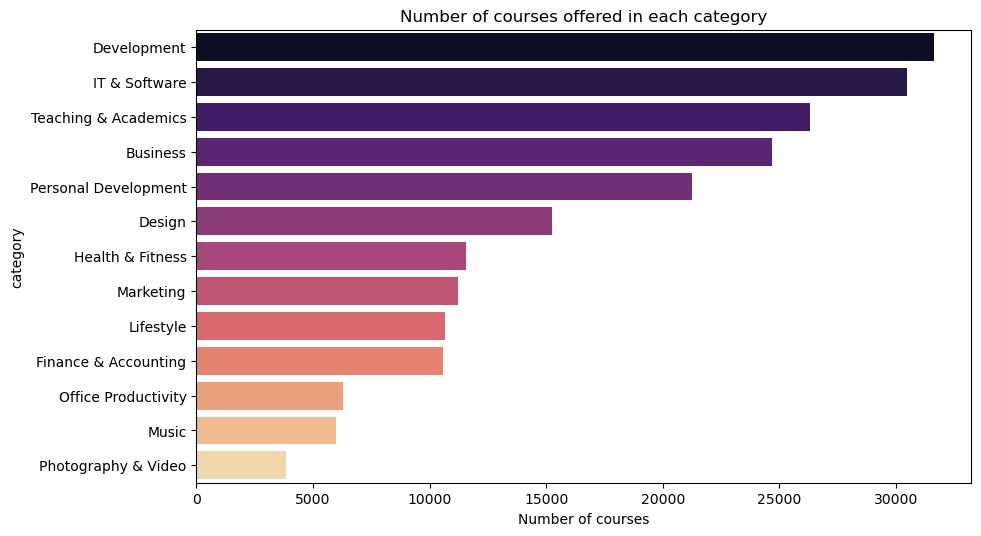

In [165]:
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(data=courses_data, y='category', order=courses_data['category'].value_counts().sort_values(ascending=False).index,palette='magma',legend=False)

plt.xlabel("Number of courses")
plt.title("Number of courses offered in each category")
plt.show()

In [166]:
category_subs = courses_data.groupby('category')['num_subscribers'].agg('sum').sort_values(ascending=False)

category_subs

category
Development             213749682.0
IT & Software           106772852.0
Business                 70012074.0
Design                   47989137.0
Marketing                40803010.0
Teaching & Academics     38302240.0
Personal Development     37214172.0
Office Productivity      27613503.0
Finance & Accounting     23822748.0
Photography & Video      13720894.0
Health & Fitness         10967501.0
Lifestyle                10066453.0
Music                     8510231.0
Name: num_subscribers, dtype: float64

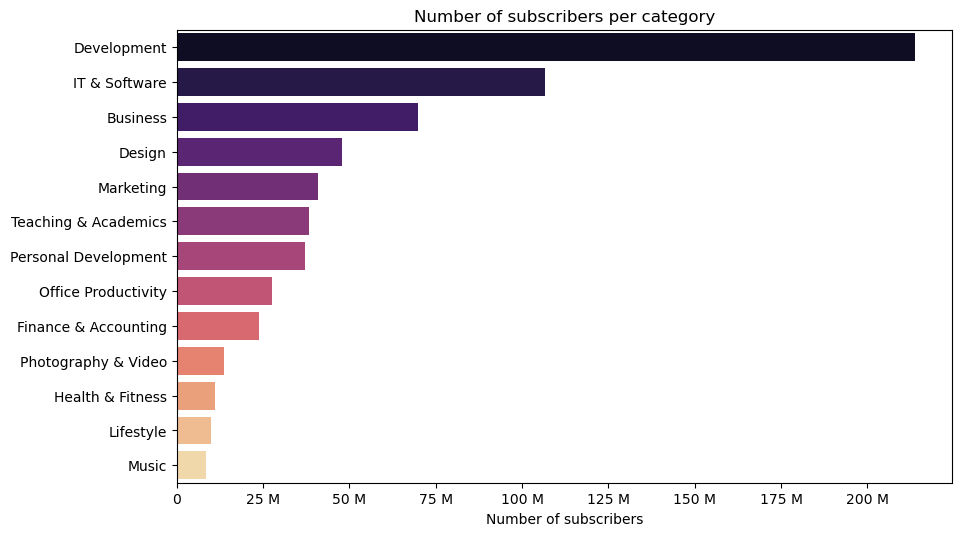

In [167]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
sns.barplot(y=category_subs.index, x=category_subs.values, palette='magma', ci=0)


ax.set_xlabel("Number of subscribers")
ax.set_ylabel("")
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.set_title("Number of subscribers per category");

In [168]:
my_cols = ['title', 'instructor_name', 'Price_in_Indian_Rupees', 'num_reviews', 'num_subscribers', 'num_comments', 'content_length_min']

def top_n_courses(courses_data, col,n):
    top_n_in_courses_data = courses_data.nlargest(n, col).reset_index(drop=True)
    return top_n_in_courses_data[my_cols]

In [169]:
top_n_courses(courses_data, 'num_reviews',5)

,title,instructor_name,Price_in_Indian_Rupees,num_reviews,num_subscribers,num_comments,content_length_min
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,16599.0,436457.0,1612862.0,39040.0,1333.0
1,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,12449.0,332598.0,1108811.0,36101.0,1264.0
2,The Web Developer Bootcamp 2022,Colt Steele,16599.0,246624.0,823805.0,31001.0,3827.0
3,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,16599.0,228108.0,771176.0,27723.0,3939.0
4,Angular - The Complete Guide (2022 Edition),Maximilian Schwarzmüller,15769.0,172991.0,626304.0,24886.0,2082.0


In [170]:
top_n_courses(courses_data, 'num_subscribers',5)

,title,instructor_name,Price_in_Indian_Rupees,num_reviews,num_subscribers,num_comments,content_length_min
0,Java Tutorial for Complete Beginners,John Purcell,0.0,96582.0,1752364.0,14919.0,968.0
1,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,16599.0,436457.0,1612862.0,39040.0,1333.0
2,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,12449.0,332598.0,1108811.0,36101.0,1264.0
3,Automate the Boring Stuff with Python Programming,Al Sweigart,4149.0,102876.0,1056369.0,13544.0,571.0
4,Machine Learning A-Z™: Hands-On Python & R In ...,Kirill Eremenko,16599.0,162432.0,896340.0,22567.0,2670.0


In [171]:
top_n_courses(courses_data, 'num_comments',5)

,title,instructor_name,Price_in_Indian_Rupees,num_reviews,num_subscribers,num_comments,content_length_min
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,16599.0,436457.0,1612862.0,39040.0,1333.0
1,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,12449.0,332598.0,1108811.0,36101.0,1264.0
2,The Web Developer Bootcamp 2022,Colt Steele,16599.0,246624.0,823805.0,31001.0,3827.0
3,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,16599.0,228108.0,771176.0,27723.0,3939.0
4,The Complete Digital Marketing Course - 12 Cou...,Rob Percival,16599.0,154985.0,706339.0,27540.0,1363.0


In [172]:
top_n_courses(courses_data, 'content_length_min',5)

,title,instructor_name,Price_in_Indian_Rupees,num_reviews,num_subscribers,num_comments,content_length_min
0,"Chemistry for IIT JEE Main & Advanced, NEET, A...",Aman Saurav,581.0,76.0,463.0,5.0,22570.0
1,Crush Your 2019 New Year's Resolution and Lear...,Mammoth Interactive,16599.0,8.0,333.0,3.0,21353.0
2,NET ENGLISH COMPLETE COURSE,Kalyani Vallath,581.0,623.0,2397.0,78.0,17275.0
3,Comprehensive Human Psychology Course,Bilal Semih Bozdemir,8299.0,4.0,536.0,1.0,15786.0
4,Kapsamlı Psikoloji Kursu,Bilal Semih Bozdemir,82999.0,328.0,2384.0,54.0,15307.0


In [173]:
top_n_courses(courses_data, 'price',5)

,title,instructor_name,Price_in_Indian_Rupees,num_reviews,num_subscribers,num_comments,content_length_min
0,"Oracle Veritabanı Programlama : SQL, PL/SQL, O...",Cihan Özhan,82999.0,570.0,32834.0,93.0,1615.0
1,React Native ile iOS ve Android Uygulama Geliş...,Yasin Ugurlu,82999.0,838.0,2940.0,141.0,557.0
2,Sıfırdan Wordpress Tema Yapımı,Ali Çınaroğlu,82999.0,206.0,1015.0,50.0,470.0
3,Go Programlama Dili,Cihan Özhan,82999.0,625.0,37154.0,79.0,1044.0
4,"SQL Server Veritabanı Programlama: Temel, Orta...",Cihan Özhan,82999.0,1348.0,49938.0,151.0,1273.0


In [174]:

subcategory_counts = courses_data.groupby(['category', 'subcategory'])['num_subscribers'].sum().reset_index()


for category in subcategory_counts['category'].unique():
    category_data = subcategory_counts[subcategory_counts['category'] == category]
    
    
    fig = px.pie(category_data, values='num_subscribers', names='subcategory', 
                 title=f'Subcategory Distribution for : {category} - based on number of subscribers in each subcategory', 
                 labels={'subcategory': 'Subcategory', 'num_subscribers': 'Number of Subscribers'})  # Set the size of the central hole
    

    fig.show()


In [175]:
subcategory_counts = courses_data.groupby(['category', 'subcategory']).size().reset_index(name='num_courses')

for category in subcategory_counts['category'].unique():
    category_data = subcategory_counts[subcategory_counts['category'] == category]
    
    fig = px.pie(category_data, values='num_courses', names='subcategory', 
                 title=f'Subcategory Distribution for {category} - Based on count of courses in each subcategory', 
                 labels={'subcategory': 'Subcategory', 'num_courses': 'Number of Courses'})
    
    fig.show()


In [182]:

courses_data['published_year'] = courses_data['published_time'].dt.year
courses_data['published_month'] = courses_data['published_time'].dt.month_name()


courses_year_count = courses_data['published_year'].value_counts()
courses_num_subs = courses_data.groupby('published_year')['num_subscribers'].sum()
courses_num_reviews = courses_data.groupby('published_year')['num_reviews'].sum()
courses_num_comments = courses_data.groupby('published_year')['num_comments'].sum()
courses_num_lectures = courses_data.groupby('published_year')['num_lectures'].sum()

group_courses_year = pd.pivot_table(courses_data, index='published_year', 
                                    values=['id', 'num_subscribers', 'num_reviews', 'num_comments', 'num_lectures'], 
                                    aggfunc={'id': len, 'num_subscribers': np.sum, 'num_reviews': np.sum, 
                                             'num_comments': np.sum, 'num_lectures': np.sum})

print('Year-wise count and sum values for different features:')
print(group_courses_year)


Year-wise count and sum values for different features:
                   id  num_comments  num_lectures  num_reviews  \
published_year                                                   
2010                4         408.0          68.0       1842.0   
2011               57       13170.0        4555.0      60041.0   
2012              464       71397.0       25592.0     358467.0   
2013             1778      233046.0       76847.0    1123207.0   
2014             3404      461284.0      140262.0    2192152.0   
2015             7102     1113930.0      298958.0    6042455.0   
2016             7975     1470159.0      367520.0    7909710.0   
2017            12258     1712435.0      561191.0    9486975.0   
2018            20653     1568422.0      941243.0    8878711.0   
2019            23529     1125888.0      974791.0    6498012.0   
2020            44929      986528.0     1573159.0    5567350.0   
2021            51457      504342.0     1618306.0    2587190.0   
2022            36124

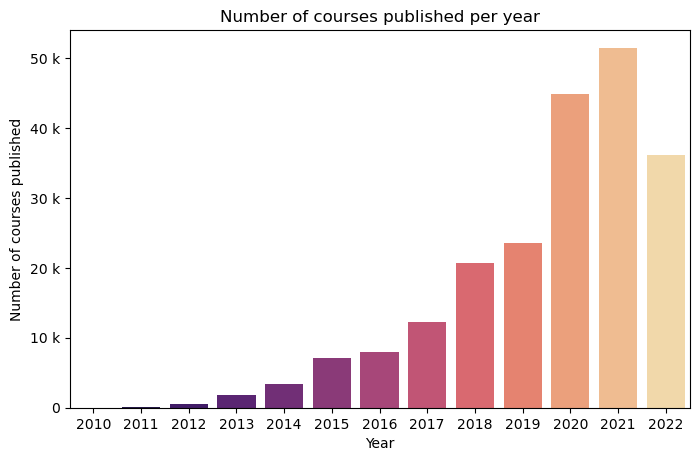

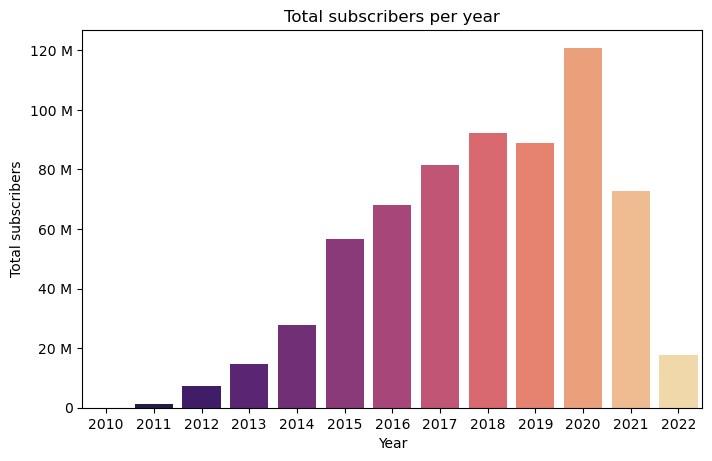

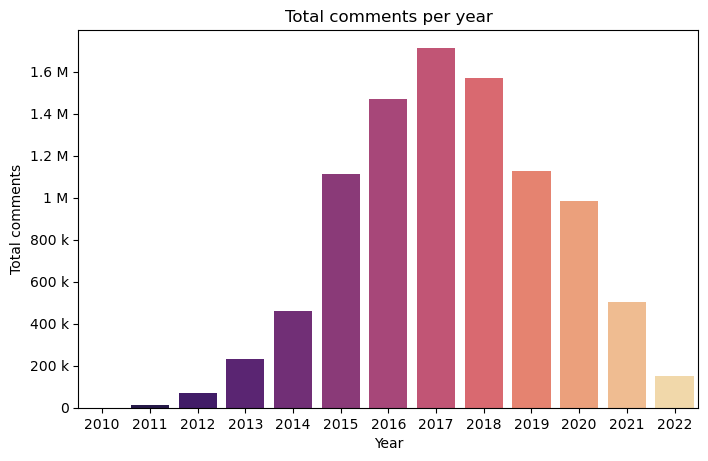

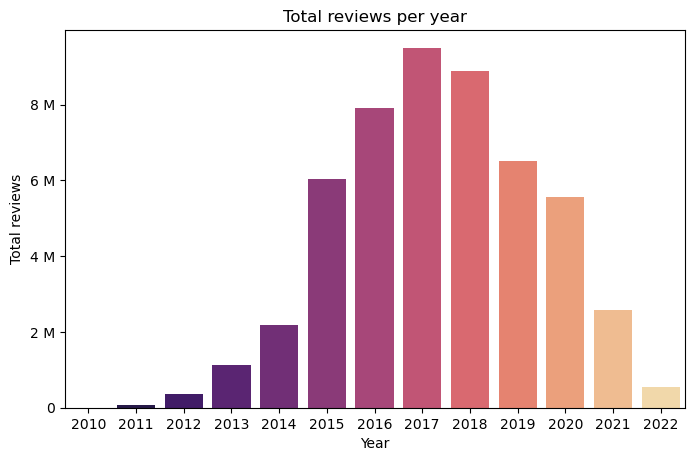

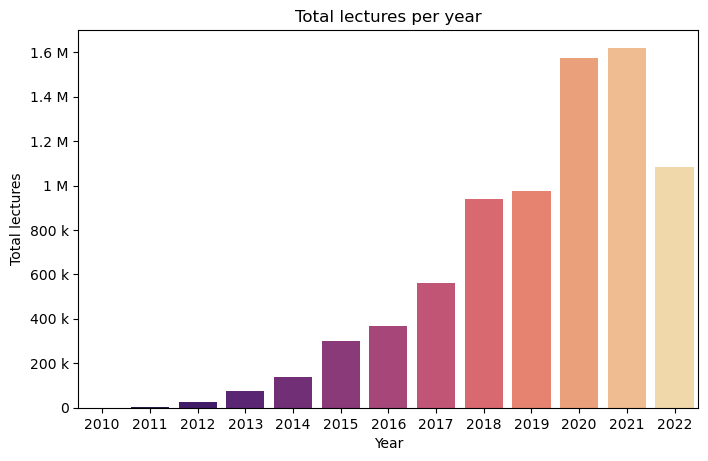

In [183]:
# Visualization of year-wise feature data
dict_cols = dict({'id': 'Number of courses published', 'num_subscribers': 'Total subscribers', 
                  'num_comments': 'Total comments', 'num_reviews': 'Total reviews',
                 'num_lectures': 'Total lectures'})

for key, val in dict_cols.items():
    df = group_courses_year
    fig, ax = plt.subplots(figsize=(8,5), dpi=100)
    sns.barplot(data=df, x=df.index, y=df[key], palette='magma')
    ax.set_xlabel("Year")
    ax.set_ylabel(val)
    ax.set_title(f'{val} per year')
    ax.yaxis.set_major_formatter(ticker.EngFormatter());